<a href="https://colab.research.google.com/github/kssubhodh/911_SJPD_Clustering/blob/main/911_SJPD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Data loading and initial checks




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_name = "sj-crime-data-2024.csv"
data = pd.read_csv(file_name)

# Display the first few rows and dataset information
print("Dataset Preview:")
print(data.head())

print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Preview:
   _id              CDTS      EID            START_DATE CALL_NUMBER  PRIORITY  \
0    1  20240101145754PS  9845345  1/1/2024 12:00:00 AM  P240010566         5   
1    2  20240101145929PS  9845352  1/1/2024 12:00:00 AM  P240010571         2   
2    3  20240101150123PS  9845322  1/1/2024 12:00:00 AM  P240010550         3   
3    4  20240101150142PS  9845311  1/1/2024 12:00:00 AM  P240010543         4   
4    5  20240101150156PS  9845302  1/1/2024 12:00:00 AM  P240010536         3   

            REPORT_DATE          OFFENSE_DATE OFFENSE_TIME CALLTYPE_CODE  \
0  1/1/2024 12:00:00 AM  1/1/2024 12:00:00 AM     14:46:15          1154   
1  1/1/2024 12:00:00 AM  1/1/2024 12:00:00 AM     14:55:27        415UNK   
2  1/1/2024 12:00:00 AM  1/1/2024 12:00:00 AM     14:15:18         WELCK   
3  1/1/2024 12:00:00 AM  1/1/2024 12:00:00 AM     14:02:55         22500   
4  1/1/2024 12:00:00 AM  1/1/2024 12:00:00 AM     13:57:46         10851   

              CALL_TYPE FINAL_DISPO_COD

# Data Visualization

In [ ]:
# Threshold for grouping rare CALL_TYPE categories
threshold = 500  # Adjust based on how many categories you want to keep distinct

# Replace rare CALL_TYPEs with 'Other'
call_type_counts = data['CALL_TYPE'].value_counts()
data['CALL_TYPE'] = data['CALL_TYPE'].apply(lambda x: x if call_type_counts[x] >= threshold else 'Other')

# Check the number of unique call types after grouping
print("Unique Call Types After Grouping:", data['CALL_TYPE'].nunique())


Unique Call Types After Grouping: 63


<ipython-input-4-9d1e453c69ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=call_type_counts.head(15).index, x=call_type_counts.head(15).values, palette="viridis")


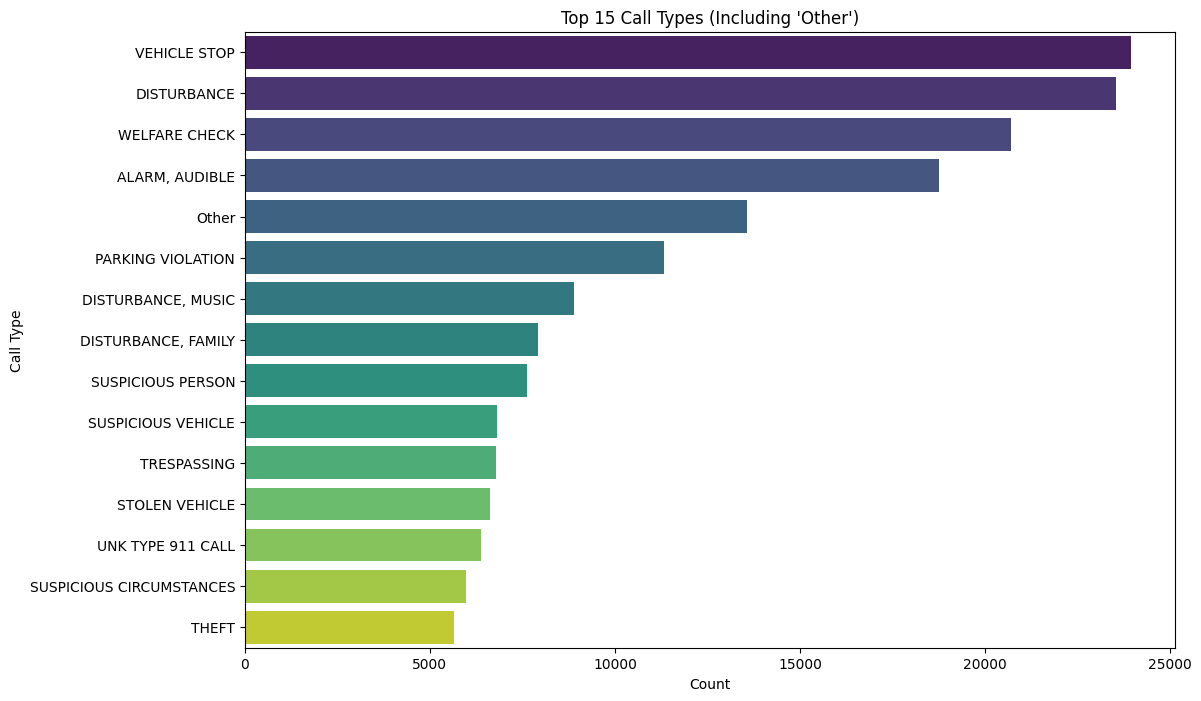

In [ ]:
# Recalculate counts after grouping
call_type_counts = data['CALL_TYPE'].value_counts()

# Plot the top categories including "Other"
plt.figure(figsize=(12, 8))
sns.barplot(y=call_type_counts.head(15).index, x=call_type_counts.head(15).values, palette="viridis")
plt.title("Top 15 Call Types (Including 'Other')")
plt.xlabel("Count")
plt.ylabel("Call Type")
plt.show()


<ipython-input-5-819cf5c6c564>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="PRIORITY", palette="viridis")


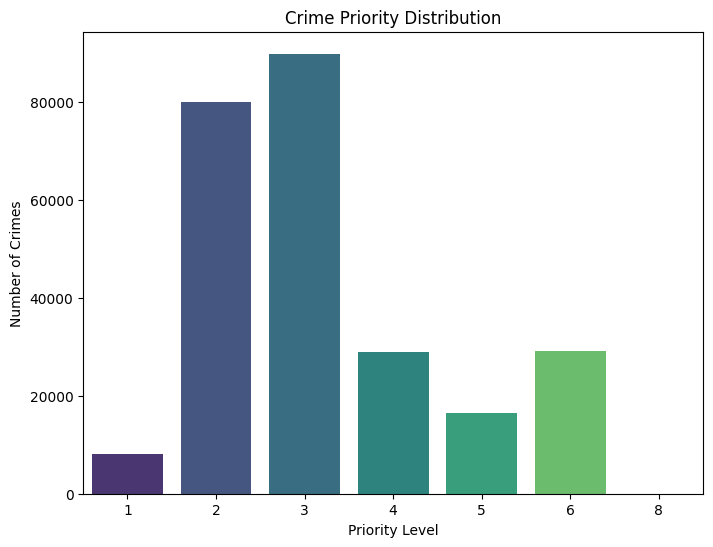

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="PRIORITY", palette="viridis")
plt.title("Crime Priority Distribution")
plt.xlabel("Priority Level")
plt.ylabel("Number of Crimes")
plt.show()


<ipython-input-6-c4927e2c31b8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['OFFENSE_DATE'] = pd.to_datetime(data['OFFENSE_DATE'], errors='coerce')
<ipython-input-6-c4927e2c31b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Month", order=range(1, 13), palette="coolwarm")


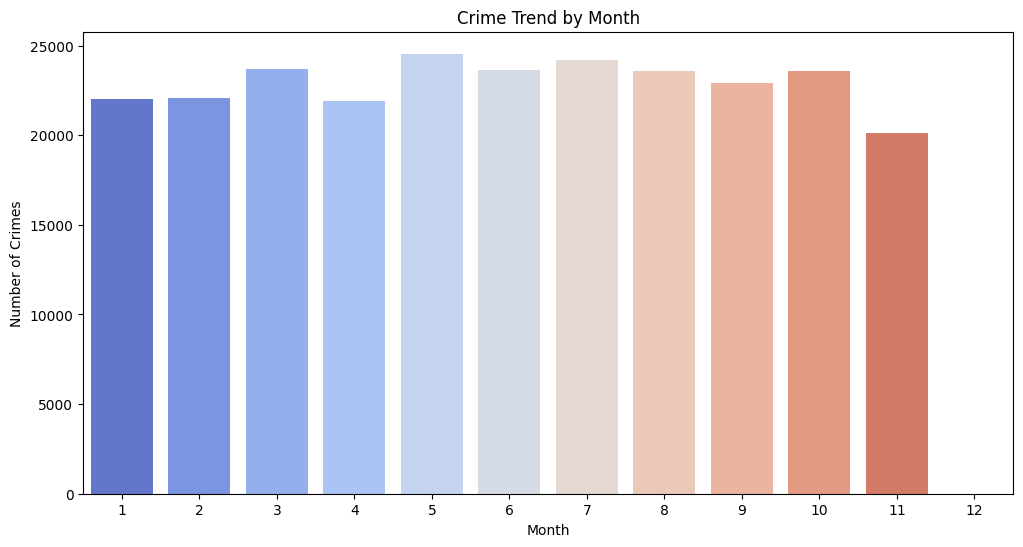

In [ ]:
# Convert 'OFFENSE_DATE' to datetime and extract month
data['OFFENSE_DATE'] = pd.to_datetime(data['OFFENSE_DATE'], errors='coerce')
data['Month'] = data['OFFENSE_DATE'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x="Month", order=range(1, 13), palette="coolwarm")
plt.title("Crime Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.show()


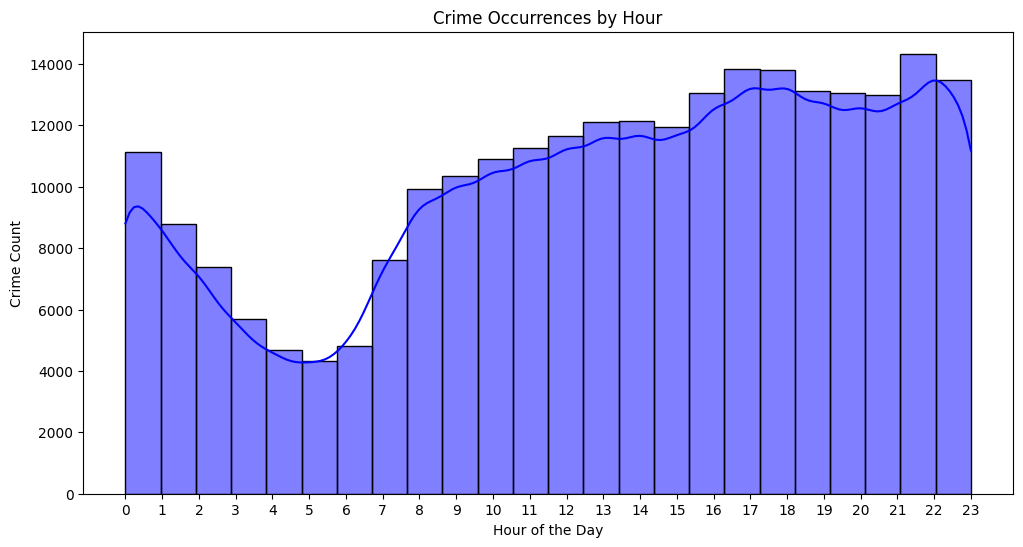

In [ ]:
# Extract hour from 'OFFENSE_TIME'
data['OFFENSE_TIME'] = pd.to_datetime(data['OFFENSE_TIME'], format='%H:%M:%S', errors='coerce')
data['Hour'] = data['OFFENSE_TIME'].dt.hour

plt.figure(figsize=(12, 6))
sns.histplot(data['Hour'], bins=24, kde=True, color='blue')
plt.title("Crime Occurrences by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Crime Count")
plt.xticks(range(0, 24))
plt.show()


In [ ]:
# Remove square brackets and dashes from the ADDRESS column
data['ADDRESS_CLEANED'] = data['ADDRESS'].str.replace(r'\[.*?\]', '', regex=True)  # Remove text within square brackets
data['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.replace('-', '', regex=False)  # Remove dashes


In [ ]:
# Remove extra spaces
data['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.strip()


In [ ]:
# Check unique address patterns
unique_addresses = data['ADDRESS_CLEANED'].unique()
print("Unique Address Samples:", unique_addresses[:10])


Unique Address Samples: ['SERVICE ST & OAKLAND RD' 'W TAYLOR ST & ASBURY ST' 'BLOSSOM HILL RD'
 'SCOTT ST' 'CINNABAR ST' 'STORY RD' nan 'CARMEL DR' 'N 5TH ST'
 'STORY RD & S CAPITOL AV']


In [ ]:
# Extract the street name (everything after the numbers)
data['STREET_NAME'] = data['ADDRESS_CLEANED'].str.extract(r'[^\d]+\s(.+)')  # Extract text after numbers


In [ ]:
data.head()

,_id,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,ADDRESS,CITY,STATE,Month,Hour,ADDRESS_CLEANED,STREET_NAME
0,1,20240101145754PS,9845345,1/1/2024 12:00:00 AM,P240010566,5,1/1/2024 12:00:00 AM,2024-01-01,1900-01-01 14:46:15,1154,SUSPICIOUS VEHICLE,N,No report required; dispatch record only,SERVICE ST & OAKLAND RD,San Jose,CA,1,14,SERVICE ST & OAKLAND RD,RD
1,2,20240101145929PS,9845352,1/1/2024 12:00:00 AM,P240010571,2,1/1/2024 12:00:00 AM,2024-01-01,1900-01-01 14:55:27,415UNK,"DISTURBANCE, UNKNOWN",DUPNCAN,No Disposition,W TAYLOR ST & ASBURY ST,San Jose,CA,1,14,W TAYLOR ST & ASBURY ST,ST
2,3,20240101150123PS,9845322,1/1/2024 12:00:00 AM,P240010550,3,1/1/2024 12:00:00 AM,2024-01-01,1900-01-01 14:15:18,WELCK,WELFARE CHECK,G,Gone on Arrival/unable to locate,[1300]-[1400] BLOSSOM HILL RD,San Jose,CA,1,14,BLOSSOM HILL RD,RD
3,4,20240101150142PS,9845311,1/1/2024 12:00:00 AM,P240010543,4,1/1/2024 12:00:00 AM,2024-01-01,1900-01-01 14:02:55,22500,PARKING VIOLATION,CAN,Canceled,[1500]-[1600] SCOTT ST,San Jose,CA,1,14,SCOTT ST,ST
4,5,20240101150156PS,9845302,1/1/2024 12:00:00 AM,P240010536,3,1/1/2024 12:00:00 AM,2024-01-01,1900-01-01 13:57:46,10851,STOLEN VEHICLE,CAN,Canceled,[800]-[900] CINNABAR ST,San Jose,CA,1,13,CINNABAR ST,ST


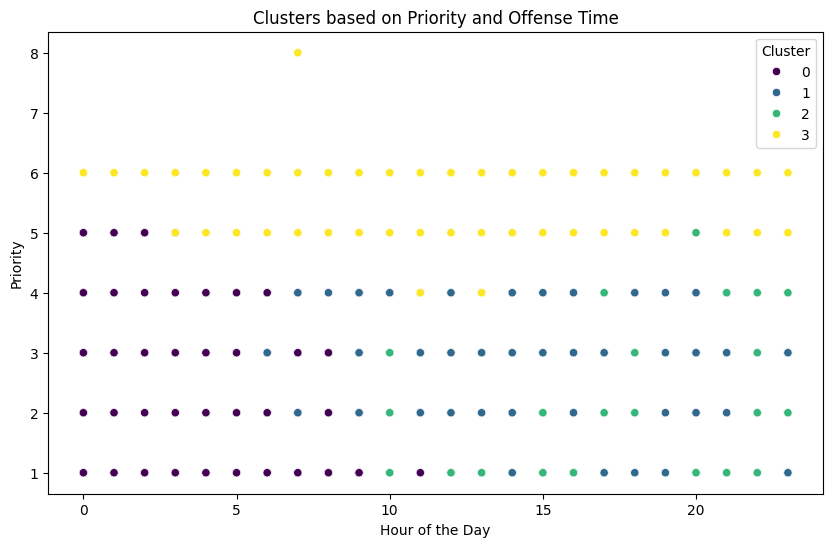

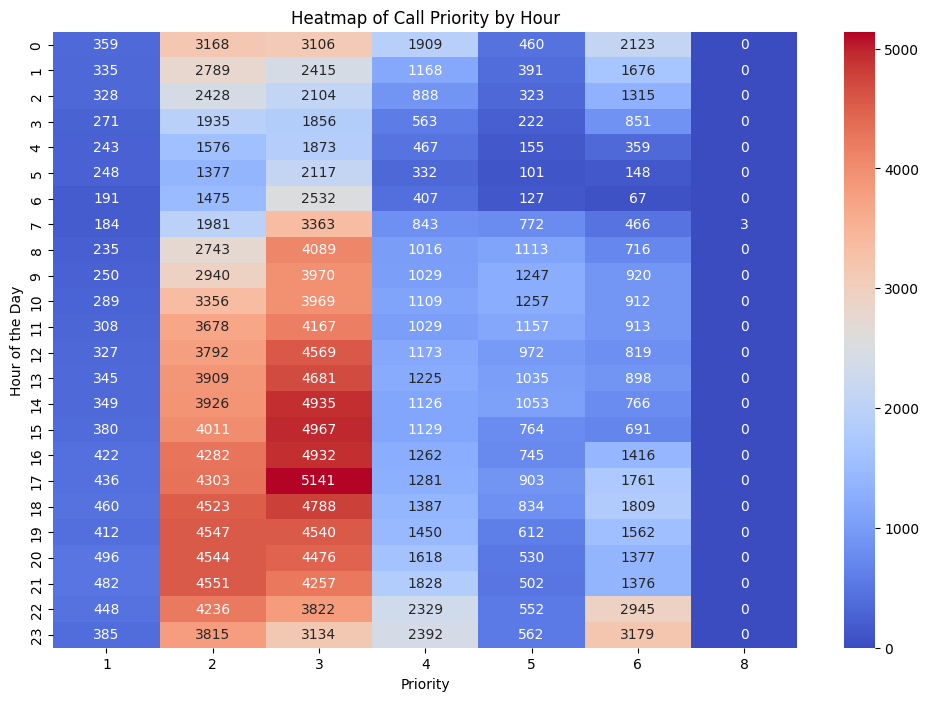

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Replace this with the correct path to your dataset


# Preprocessing
# Extract hour and minute from the OFFENSE_TIME column
data['OFFENSE_HOUR'] = pd.to_datetime(data['OFFENSE_TIME'], format='%H:%M:%S').dt.hour
data['OFFENSE_MINUTE'] = pd.to_datetime(data['OFFENSE_TIME'], format='%H:%M:%S').dt.minute

# Select relevant features for clustering
features = data[['PRIORITY', 'OFFENSE_HOUR', 'OFFENSE_MINUTE']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose an appropriate number of clusters
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters with Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['OFFENSE_HOUR'], y=data['PRIORITY'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters based on Priority and Offense Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Priority')
plt.legend(title='Cluster')
plt.show()

# Create a temporal heatmap
heatmap_data = data.groupby(['OFFENSE_HOUR', 'PRIORITY']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Heatmap of Call Priority by Hour')
plt.xlabel('Priority')
plt.ylabel('Hour of the Day')
plt.show()


In [ ]:
'''import pandas as pd
from geopy.geocoders import Nominatim
from time import sleep

# Load the dataset
file_path = "address_geo.csv"
data = pd.read_csv(file_path)

# Initialize the geocoder
geolocator = Nominatim(user_agent="geo_locator")

# Function to get latitude and longitude
def get_lat_long(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return pd.Series([location.latitude, location.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# Geocode addresses with a delay to avoid hitting rate limits
for index, row in data.iterrows():
    address = f"{row['ADDRESS_CLEANED']}, {row['CITY']}, {row['STATE']}"
    data.loc[index, ['Latitude', 'Longitude']] = get_lat_long(address)
    sleep(1)  # Pause to respect API limits

# Save results to a new CSV
output_file = "geocoded_addresses.csv"
data.to_csv(output_file, index=False)
print(f"Geocoding complete! Results saved to {output_file}")
'''

'import pandas as pd\nfrom geopy.geocoders import Nominatim\nfrom time import sleep\n\n# Load the dataset\nfile_path = "address_geo.csv"\ndata = pd.read_csv(file_path)\n\n# Initialize the geocoder\ngeolocator = Nominatim(user_agent="geo_locator")\n\n# Function to get latitude and longitude\ndef get_lat_long(address):\n    try:\n        location = geolocator.geocode(address)\n        if location:\n            return pd.Series([location.latitude, location.longitude])\n        else:\n            return pd.Series([None, None])\n    except:\n        return pd.Series([None, None])\n\n# Geocode addresses with a delay to avoid hitting rate limits\nfor index, row in data.iterrows():\n    address = f"{row[\'ADDRESS_CLEANED\']}, {row[\'CITY\']}, {row[\'STATE\']}"\n    data.loc[index, [\'Latitude\', \'Longitude\']] = get_lat_long(address)\n    sleep(1)  # Pause to respect API limits\n\n# Save results to a new CSV\noutput_file = "geocoded_addresses.csv"\ndata.to_csv(output_file, index=False)\nprint

 Classification:  to predict PRIORITY using Decision Trees or Random Forests

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.54      0.57      1650
           2       0.67      0.88      0.76     15946
           3       0.81      0.69      0.75     18026
           4       0.78      0.62      0.69      5722
           5       0.53      0.36      0.43      3210
           6       0.99      0.99      0.99      5902
           8       0.00      0.00      0.00         2

    accuracy                           0.75     50458
   macro avg       0.62      0.58      0.60     50458
weighted avg       0.76      0.75      0.75     50458

Decision Tree Accuracy: 0.7511593800784812

Random Forest Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

              precision    recall  f1-score   support

           1       0.60      0.53      0.56      1650
           2       0.67      0.88      0.76     15946
           3       0.81      0.69      0.74     18026
           4       0.78      0.62      0.69      5722
           5       0.52      0.36      0.43      3210
           6       0.99      0.99      0.99      5902
           8       0.00      0.00      0.00         2

    accuracy                           0.75     50458
   macro avg       0.62      0.58      0.60     50458
weighted avg       0.76      0.75      0.75     50458

Random Forest Accuracy: 0.7510008323754409


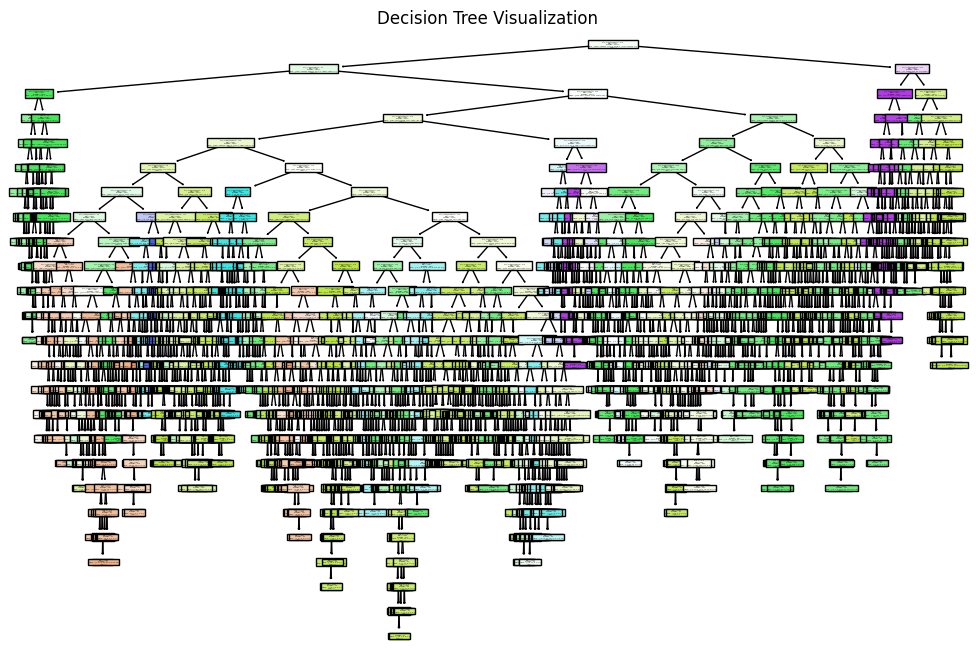

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


# Preprocessing
# Encode CALL_TYPE as numeric
encoder = LabelEncoder()
data['CALL_TYPE_Encoded'] = encoder.fit_transform(data['CALL_TYPE'])

# Select features and target (excluding DayOfWeek)
features = data[['Hour', 'CALL_TYPE_Encoded']]
target = data['PRIORITY']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_predictions)}")

# Evaluate the Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}")

# Visualize the Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features.columns, class_names=target.unique().astype(str), filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Anomaly detection


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, support = precision_recall_fscore_support(y_test, dt_predictions, zero_division=0)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Support:", support)


Precision: [0.59470199 0.66898258 0.81279497 0.77789934 0.52560647 0.98962938
 0.        ]
Recall: [0.54424242 0.8816004  0.68789526 0.62128626 0.36448598 0.98627584
 0.        ]
F1-Score: [0.56835443 0.76071429 0.74514753 0.69082783 0.43046358 0.98794976
 0.        ]
Support: [ 1650 15946 18026  5722  3210  5902     2]


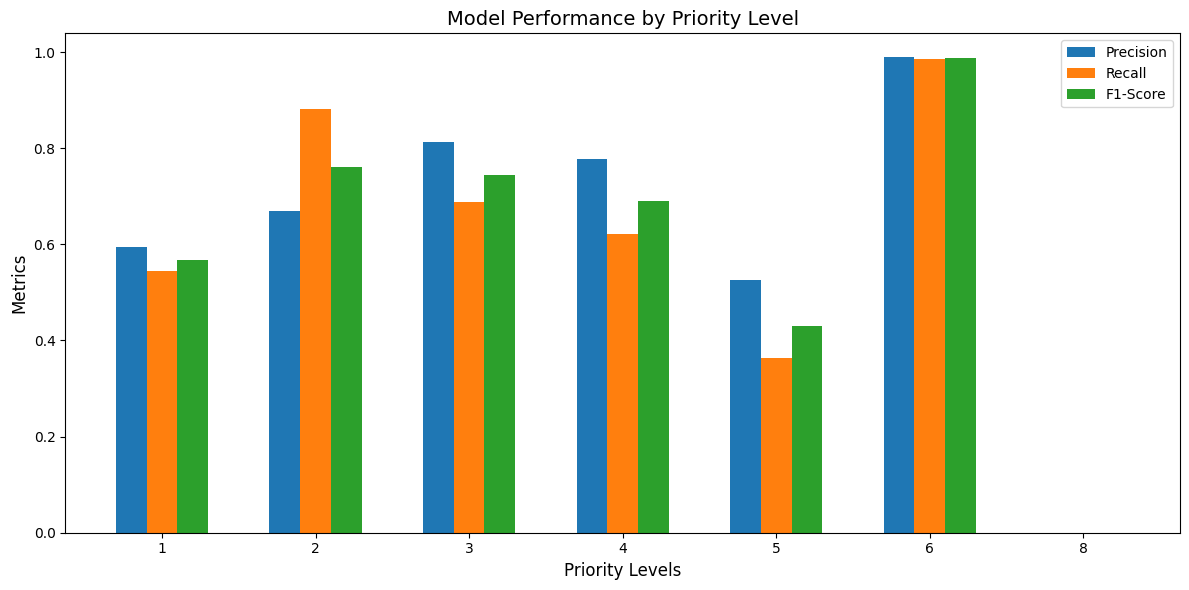

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
priorities = ["1", "2", "3", "4", "5", "6", "8"]
precision = [0.59470199, 0.66898258, 0.81279497, 0.77789934, 0.52560647, 0.98962938, 0.0]
recall = [0.54424242, 0.8816004, 0.68789526, 0.62182626, 0.36448598, 0.98627584, 0.0]
f1_score = [0.56835443, 0.76071429, 0.74514753, 0.69082783, 0.43046358, 0.98794976, 0.0]
support = [1650, 15946, 18026, 5722, 3210, 5902, 2]

# Bar width
bar_width = 0.2
x = np.arange(len(priorities))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, precision, width=bar_width, label="Precision")
plt.bar(x, recall, width=bar_width, label="Recall")
plt.bar(x + bar_width, f1_score, width=bar_width, label="F1-Score")

# Labels and legend
plt.xlabel("Priority Levels", fontsize=12)
plt.ylabel("Metrics", fontsize=12)
plt.title("Model Performance by Priority Level", fontsize=14)
plt.xticks(x, priorities)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test is the true labels and dt_predictions are predictions from the decision tree

# Accuracy
accuracy = accuracy_score(y_test, dt_predictions)

# Macro Average (Treats all classes equally)
precision_macro = precision_score(y_test, dt_predictions, average='macro', zero_division=0)
recall_macro = recall_score(y_test, dt_predictions, average='macro', zero_division=0)
f1_macro = f1_score(y_test, dt_predictions, average='macro', zero_division=0)

# Weighted Average (Considers class imbalance)
precision_weighted = precision_score(y_test, dt_predictions, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, dt_predictions, average='weighted', zero_division=0)
f1_weighted = f1_score(y_test, dt_predictions, average='weighted', zero_division=0)

# Display the metrics
print("Overall Metrics for Decision Tree Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro Average Precision: {precision_macro:.2f}")
print(f"Macro Average Recall: {recall_macro:.2f}")
print(f"Macro Average F1-Score: {f1_macro:.2f}")
print(f"Weighted Average Precision: {precision_weighted:.2f}")
print(f"Weighted Average Recall: {recall_weighted:.2f}")
print(f"Weighted Average F1-Score: {f1_weighted:.2f}")


Overall Metrics for Decision Tree Classifier:
Accuracy: 0.75
Macro Average Precision: 0.62
Macro Average Recall: 0.58
Macro Average F1-Score: 0.60
Weighted Average Precision: 0.76
Weighted Average Recall: 0.75
Weighted Average F1-Score: 0.75


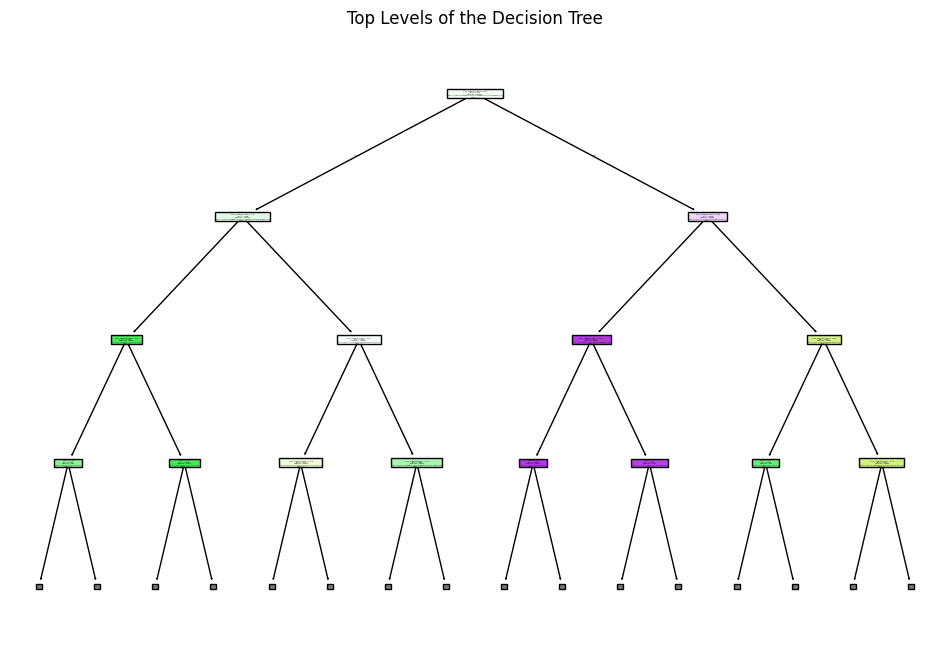

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'dt_model' is your trained Decision Tree Classifier

# Set max_depth for visualization (e.g., only 3 levels)
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(
    dt_model,
    feature_names=features.columns,  # Replace 'features' with your feature set
    class_names=[str(cls) for cls in target.unique()],  # Replace 'target' with your labels
    filled=True,
    max_depth=3  # Limit depth to 3 levels
)

plt.title("Top Levels of the Decision Tree")
plt.show()


In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Select features for anomaly detection
features = data[['Hour', 'PRIORITY', 'CALL_TYPE_Encoded']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit the One-Class SVM model
svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)  # Adjust gamma and nu as needed
data['Anomaly'] = svm.fit_predict(scaled_features)

# Anomalies are labeled as -1; normal points are 1
anomalies = data[data['Anomaly'] == -1]

# Save anomalies to a CSV file
anomalies_file = 'anomalies_one_class_svm.csv'  # Save in the current working directory
anomalies.to_csv(anomalies_file, index=False)

# Automatically download the CSV file (Colab-specific)
from google.colab import files
files.download(anomalies_file)
'''


"\nimport pandas as pd\nimport numpy as np\nfrom sklearn.svm import OneClassSVM\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\n\n\n\n# Select features for anomaly detection\nfeatures = data[['Hour', 'PRIORITY', 'CALL_TYPE_Encoded']]\n\n# Normalize the features\nscaler = StandardScaler()\nscaled_features = scaler.fit_transform(features)\n\n# Fit the One-Class SVM model\nsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)  # Adjust gamma and nu as needed\ndata['Anomaly'] = svm.fit_predict(scaled_features)\n\n# Anomalies are labeled as -1; normal points are 1\nanomalies = data[data['Anomaly'] == -1]\n\n# Save anomalies to a CSV file\nanomalies_file = 'anomalies_one_class_svm.csv'  # Save in the current working directory\nanomalies.to_csv(anomalies_file, index=False)\n\n# Automatically download the CSV file (Colab-specific)\nfrom google.colab import files\nfiles.download(anomalies_file)\n"

Regression

In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Preprocessing
# Convert START_DATE and OFFENSE_DATE to datetime
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['OFFENSE_DATE'] = pd.to_datetime(data['OFFENSE_DATE'], errors='coerce')

# Calculate the duration (in minutes) between START_DATE and OFFENSE_DATE
data['Duration'] = (data['OFFENSE_DATE'] - data['START_DATE']).dt.total_seconds() / 60.0

# Drop rows with missing or negative durations
data = data[data['Duration'] > 0]

# Encode CALL_TYPE as numeric
data['CALL_TYPE_Encoded'] = LabelEncoder().fit_transform(data['CALL_TYPE'])

# Select features and target
features = data[['Hour', 'PRIORITY', 'CALL_TYPE_Encoded']]
target = data['Duration']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, lr_predictions):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, lr_predictions):.2f}")
print(f"R² Score: {r2_score(y_test, lr_predictions):.2f}")

# Evaluate Random Forest Regression
print("\nRandom Forest Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, rf_predictions):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, rf_predictions):.2f}")
print(f"R² Score: {r2_score(y_test, rf_predictions):.2f}")

# Visualize Predictions vs Actual for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Predicted vs Actual Durations')
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.show()
'''

'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score\nfrom sklearn.preprocessing import LabelEncoder\nimport matplotlib.pyplot as plt\n\n\n\n# Preprocessing\n# Convert START_DATE and OFFENSE_DATE to datetime\ndata[\'START_DATE\'] = pd.to_datetime(data[\'START_DATE\'], errors=\'coerce\')\ndata[\'OFFENSE_DATE\'] = pd.to_datetime(data[\'OFFENSE_DATE\'], errors=\'coerce\')\n\n# Calculate the duration (in minutes) between START_DATE and OFFENSE_DATE\ndata[\'Duration\'] = (data[\'OFFENSE_DATE\'] - data[\'START_DATE\']).dt.total_seconds() / 60.0\n\n# Drop rows with missing or negative durations\ndata = data[data[\'Duration\'] > 0]\n\n# Encode CALL_TYPE as numeric\ndata[\'CALL_TYPE_Encoded\'] = LabelEncoder().fit_transform(data[\'CALL_TYPE\'])\n\n# Select features and tar

In [ ]:
'''
print(data[['START_DATE', 'OFFENSE_DATE', 'Duration']].head())
print(f"Number of valid rows: {len(data)}")
'''

'\nprint(data[[\'START_DATE\', \'OFFENSE_DATE\', \'Duration\']].head())\nprint(f"Number of valid rows: {len(data)}")\n'

In [ ]:
'''from geopy.geocoders import Nominatim
import time

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapi")

# Function to geocode an address
def geocode_address(address):
    try:
        location = geolocator.geocode(f"{address}, San Jose")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply the geocoding function to your dataset
data['Latitude'], data['Longitude'] = zip(*data['ADDRESS'].apply(geocode_address))

# Drop rows with missing coordinates
data = data.dropna(subset=['Latitude', 'Longitude'])
'''

'from geopy.geocoders import Nominatim\nimport time\n\n# Initialize the geolocator\ngeolocator = Nominatim(user_agent="geoapi")\n\n# Function to geocode an address\ndef geocode_address(address):\n    try:\n        location = geolocator.geocode(f"{address}, San Jose")\n        if location:\n            return location.latitude, location.longitude\n        else:\n            return None, None\n    except:\n        return None, None\n\n# Apply the geocoding function to your dataset\ndata[\'Latitude\'], data[\'Longitude\'] = zip(*data[\'ADDRESS\'].apply(geocode_address))\n\n# Drop rows with missing coordinates\ndata = data.dropna(subset=[\'Latitude\', \'Longitude\'])\n'

In [ ]:
'''
from geopy.geocoders import Nominatim
from tqdm import tqdm

geolocator = Nominatim(user_agent="crime_analysis")
tqdm.pandas()

# Function to geocode an address
def geocode_address(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except:
        return None, None

# Apply geocoding to cleaned addresses
data[['LATITUDE', 'LONGITUDE']] = data['ADDRESS_CLEANED'].progress_apply(
    lambda x: pd.Series(geocode_address(x))
)
'''

'\nfrom geopy.geocoders import Nominatim\nfrom tqdm import tqdm\n\ngeolocator = Nominatim(user_agent="crime_analysis")\ntqdm.pandas()\n\n# Function to geocode an address\ndef geocode_address(address):\n    try:\n        location = geolocator.geocode(address)\n        if location:\n            return location.latitude, location.longitude\n        else:\n            return None, None\n    except:\n        return None, None\n\n# Apply geocoding to cleaned addresses\ndata[[\'LATITUDE\', \'LONGITUDE\']] = data[\'ADDRESS_CLEANED\'].progress_apply(\n    lambda x: pd.Series(geocode_address(x))\n)\n'

In [ ]:
'''
# Clean the ADDRESS column (removing square brackets, dashes, and extra spaces)
data['ADDRESS_CLEANED'] = data['ADDRESS'].str.replace(r'\[.*?\]', '', regex=True)  # Remove text within brackets
data['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.replace('-', '', regex=False)  # Remove dashes
data['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.strip()  # Remove extra spaces

# Group by cleaned addresses
address_counts = data['ADDRESS_CLEANED'].value_counts().reset_index()
address_counts.columns = ['Address', 'Crime Count']

# Display the top 10 addresses with the most crimes
print(address_counts.head(50))
'''

"\n# Clean the ADDRESS column (removing square brackets, dashes, and extra spaces)\ndata['ADDRESS_CLEANED'] = data['ADDRESS'].str.replace(r'\\[.*?\\]', '', regex=True)  # Remove text within brackets\ndata['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.replace('-', '', regex=False)  # Remove dashes\ndata['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.strip()  # Remove extra spaces\n\n# Group by cleaned addresses\naddress_counts = data['ADDRESS_CLEANED'].value_counts().reset_index()\naddress_counts.columns = ['Address', 'Crime Count']\n\n# Display the top 10 addresses with the most crimes\nprint(address_counts.head(50))\n"

In [ ]:
'''# Plot top 20 addresses with the most crimes
top_n = 20
plt.figure(figsize=(12, 8))
sns.barplot(data=address_counts.head(top_n), y='Address', x='Crime Count', palette='coolwarm')
plt.title(f"Top {top_n} Crime-Prone Locations")
plt.xlabel("Crime Count")
plt.ylabel("Address")
plt.tight_layout()
plt.show()
'''


'# Plot top 20 addresses with the most crimes\ntop_n = 20\nplt.figure(figsize=(12, 8))\nsns.barplot(data=address_counts.head(top_n), y=\'Address\', x=\'Crime Count\', palette=\'coolwarm\')\nplt.title(f"Top {top_n} Crime-Prone Locations")\nplt.xlabel("Crime Count")\nplt.ylabel("Address")\nplt.tight_layout()\nplt.show()\n'

In [ ]:
'''# Clean the ADDRESS column (remove square brackets, dashes, and extra spaces)
data['ADDRESS_CLEANED'] = data['ADDRESS'].str.replace(r'\[.*?\]', '', regex=True)  # Remove square brackets
data['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.replace('-', '', regex=False)  # Remove dashes
data['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.strip()  # Strip leading/trailing spaces

# Optionally extract just the street name (remove house numbers)
data['STREET_NAME'] = data['ADDRESS_CLEANED'].str.replace(r'^\d+\s+', '', regex=True)

# Check top frequent streets
street_counts = data['STREET_NAME'].value_counts().reset_index()
street_counts.columns = ['Street Name', 'Crime Count']

# Display the top 10 streets with the most crimes
print(street_counts.head(10))
'''

"# Clean the ADDRESS column (remove square brackets, dashes, and extra spaces)\ndata['ADDRESS_CLEANED'] = data['ADDRESS'].str.replace(r'\\[.*?\\]', '', regex=True)  # Remove square brackets\ndata['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.replace('-', '', regex=False)  # Remove dashes\ndata['ADDRESS_CLEANED'] = data['ADDRESS_CLEANED'].str.strip()  # Strip leading/trailing spaces\n\n# Optionally extract just the street name (remove house numbers)\ndata['STREET_NAME'] = data['ADDRESS_CLEANED'].str.replace(r'^\\d+\\s+', '', regex=True)\n\n# Check top frequent streets\nstreet_counts = data['STREET_NAME'].value_counts().reset_index()\nstreet_counts.columns = ['Street Name', 'Crime Count']\n\n# Display the top 10 streets with the most crimes\nprint(street_counts.head(10))\n"

In [ ]:
'''# Plot top 20 streets with the most crimes
top_n = 20
plt.figure(figsize=(12, 8))
sns.barplot(data=street_counts.head(top_n), y='Street Name', x='Crime Count', palette='coolwarm')
plt.title(f"Top {top_n} Crime-Prone Streets in San Jose")
plt.xlabel("Crime Count")
plt.ylabel("Street Name")
plt.tight_layout()
plt.show()
'''

'# Plot top 20 streets with the most crimes\ntop_n = 20\nplt.figure(figsize=(12, 8))\nsns.barplot(data=street_counts.head(top_n), y=\'Street Name\', x=\'Crime Count\', palette=\'coolwarm\')\nplt.title(f"Top {top_n} Crime-Prone Streets in San Jose")\nplt.xlabel("Crime Count")\nplt.ylabel("Street Name")\nplt.tight_layout()\nplt.show()\n'

#  Data Preparation and Cleaning

In [ ]:
'''missing_values = data.isnull().sum()
print(missing_values)
'''

'missing_values = data.isnull().sum()\nprint(missing_values)\n'

In [ ]:
'''common_addresses = data.groupby('CALL_TYPE')['ADDRESS'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'UNKNOWN')
data['ADDRESS'] = data.apply(lambda row: common_addresses[row['CALL_TYPE']] if pd.isnull(row['ADDRESS']) else row['ADDRESS'], axis=1)
'''

"common_addresses = data.groupby('CALL_TYPE')['ADDRESS'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 'UNKNOWN')\ndata['ADDRESS'] = data.apply(lambda row: common_addresses[row['CALL_TYPE']] if pd.isnull(row['ADDRESS']) else row['ADDRESS'], axis=1)\n"

In [ ]:
'''data_with_address = data[data['ADDRESS'].notnull()]
data_missing_address = data[data['ADDRESS'].isnull()]
'''

"data_with_address = data[data['ADDRESS'].notnull()]\ndata_missing_address = data[data['ADDRESS'].isnull()]\n"

In [ ]:
'''data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['OFFENSE_TIME'] = pd.to_datetime(data['OFFENSE_TIME'], format='%H:%M:%S', errors='coerce').dt.time
'''

"data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')\ndata['OFFENSE_TIME'] = pd.to_datetime(data['OFFENSE_TIME'], format='%H:%M:%S', errors='coerce').dt.time\n"

In [ ]:
'''print(data['START_DATE'].head(20))  # Inspect the first 20 entries
print(data['START_DATE'].unique())  # Check unique formats
'''

"print(data['START_DATE'].head(20))  # Inspect the first 20 entries\nprint(data['START_DATE'].unique())  # Check unique formats\n"

In [ ]:
'''data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
'''

"data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%Y-%m-%d %H:%M:%S', errors='coerce')\n"

In [ ]:
'''data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
print(data[data['START_DATE'].isnull()])  # Inspect rows with invalid dates
'''

"data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')\nprint(data[data['START_DATE'].isnull()])  # Inspect rows with invalid dates\n"

In [ ]:
'''data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
print(data[data['START_DATE'].isnull()])  # Inspect rows with invalid dates
'''

"data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')\nprint(data[data['START_DATE'].isnull()])  # Inspect rows with invalid dates\n"

In [ ]:
'''data = data.dropna(subset=['START_DATE'])
'''

"data = data.dropna(subset=['START_DATE'])\n"